In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reading the data
TicketData=pd.read_csv('/content/sample_data/supportTicketData.csv')

# Printing number of rows and columns
print(TicketData.shape)

# Printing sample rows
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


urgency
P1    6748
P2    5528
P3    7520
dtype: int64


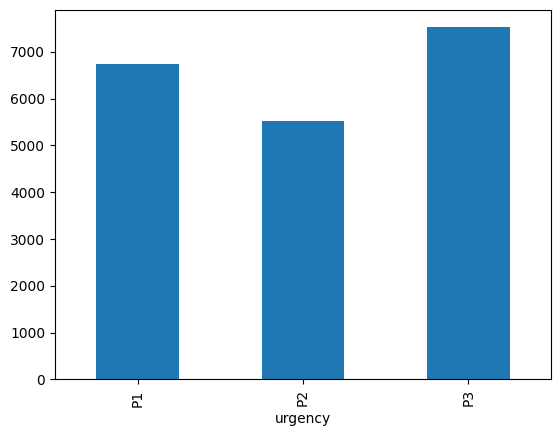

In [ ]:
# Number of unique values for urgency column
# You can see there are 3 ticket types
print(TicketData.groupby('urgency').size())

# Plotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar');

In [ ]:
# Count vectorization of text
from sklearn.feature_extraction.text import TfidfVectorizer

# Ticket Data
corpus = TicketData['body'].values

# Creating the vectorizer
vectorizer = TfidfVectorizer()

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Priority']=TicketData['urgency']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(19796, 9347)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2


In [9]:
# Defining an empty dictionary to store the values
GloveWordVectors = {}

# Reading Glove Data
with open("/content/sample_data/glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], "float")
        GloveWordVectors[word] = vector

In [10]:
# Checking the total number of words present
len(GloveWordVectors.keys())

4898

In [12]:
# Each word has a numeric representation of 50 numbers
GloveWordVectors['bye'] = np.zeros(50)

In [13]:
GloveWordVectors['the'].shape


(50,)

In [14]:
# Sample glove word vector
GloveWordVectors['bye']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]

# Printing sample words
WordsVocab[0:10]

Index(['ab', 'abandon', 'abandoned', 'abc', 'abeam', 'abilities', 'ability',
       'able', 'abnormal', 'abnormally'],
      dtype='object')